# Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
#lets load the data set in our system 

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
df=pd.read_csv('global_power_plant_database.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Data preprocessing

In [5]:
df.country.value_counts()

IND    908
Name: country, dtype: int64

observations:

    1.there is no uniqueness,we simply drop this feature column.

In [6]:
df.country_long.value_counts()

India    908
Name: country_long, dtype: int64

observations:
    
    1.there is no uniqueness,we simply drop this feature column.

In [7]:
df.name.value_counts()

MANERI BHALI                           1
RAIGARH TPP                            1
TADALI SPONGE IRON                     1
Sadeipali - REHPL Solar Power Plant    1
KUNDANKULAM                            1
                                      ..
ANAPARA "C"                            1
BHIGWAN MILL                           1
Sadeipali - ASPL Solar Power Plant     1
PALATANA CCPP                          1
VALANTHARVI GT                         1
Name: name, Length: 908, dtype: int64

observations:

    1.This feature column is simply represents the name of power plants and hence there is no impacting on target column.
    
    2.There is no uniqueness,we simply drop this feature column.

In [8]:
df.gppd_idnr.value_counts()

WRI1020011    1
WRI1026205    1
IND0000422    1
WRI1026107    1
IND0000414    1
             ..
WRI1019923    1
WRI1026130    1
WRI1026669    1
IND0000357    1
WRI1026186    1
Name: gppd_idnr, Length: 908, dtype: int64

observations:

    1.This feature column is simply represents the ID of power plants and hence there is no impacting on target column.
    
    2.There is no uniqueness,we simply drop this feature column.

In [9]:
df.capacity_mw.value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

observations:

    1.This feature column is simply represents the capacity of power plants and this is our target column as well.
    
    

In [10]:
df.latitude.value_counts()

24.1917    3
19.0004    3
10.3118    2
15.1839    2
14.2133    2
          ..
23.9784    1
24.5216    1
17.5010    1
20.9099    1
16.3125    1
Name: latitude, Length: 837, dtype: int64

In [11]:
df.longitude.value_counts()

71.6917    4
75.8988    3
81.2875    3
71.6918    3
72.8983    3
          ..
79.0548    1
78.6463    1
88.4562    1
75.5302    1
87.2500    1
Name: longitude, Length: 828, dtype: int64

In [12]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

observations:

    1.This feature column is simply represents the Primary fuel of power plants at which plant is running..
    
   

In [13]:
df.other_fuel1.value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

observations:

    1.This feature column is simply represents the other fuel at which plant runs.
    
    2.oil is best among all for secondary fuel.

In [14]:
df.other_fuel2.value_counts()

Oil    1
Name: other_fuel2, dtype: int64

Observation:
    
    1.As no suggests only single element which means one 1 plant uses third fuel type so we easily drop this feature column.

In [15]:
df.other_fuel3.value_counts()

Series([], Name: other_fuel3, dtype: int64)

observations:

    1.This is 4 th fuel type at which plant runs when other fuels types are malfunctioned,
    and numbers suggest that no plant is devloped for 4 th fuel type,
    hence we drop this feature column.

In [16]:
df.commissioning_year.value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

Observations:
    1. Most of the power plants are established in year 2012 to 2015. 

In [17]:
df.owner.value_counts()

Sterling Agro Industries ltd.               4
Jk Cement ltd                               4
Acc Acc ltd                                 4
Tata Power Solar Systems Limited (TPREL)    3
Enercon India Ltd.                          3
                                           ..
Godawari Green Energy Limited (GGEL)        1
Videocon Industries Limited                 1
Binani Industries ltd                       1
Jodhpur Vidyut Vitran Nigam Limited         1
Northern Solaire Prakash Private Limited    1
Name: owner, Length: 280, dtype: int64

In [18]:
df.source.value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Se Pvt Rsolar                                  1
Mukesh Gupta group                             1
Orient Cement ltd                              1
Manikgarh Manikgarh cement                     1
Indo Synthetics ltd                            1
Name: source, Length: 191, dtype: int64

Observations:
    1. Major power plants are under  central government or Central Electricity Authority. 

In [19]:
df.url.value_counts()

http://www.cea.nic.in/                                                                                                                                                         520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                                                                  7
http://www.ntpc.co.in                                                                                                                                                            6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                                                                 5
http://energy.rajasthan.gov.in/content/dam/raj/energy/common/Details%20of%20commissioned%20Solar%20Projects%20.pdf                                                               4
                                                                                                         

Observations:

    1. this are the urls of the power plants and hence there is no impact on capacity generation so we drop this feature column.

In [20]:
df.geolocation_source.value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [21]:
df.wepp_id.value_counts()

Series([], Name: wepp_id, dtype: int64)

Observations:
    
    1. we drop this feature column as no obserable data is present.

In [22]:
df.year_of_capacity_data.value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [23]:
df.generation_gwh_2013.value_counts()

0.00000       21
1262.13760     1
182.13000      1
108.98235      1
808.83550      1
              ..
2998.44600     1
3683.91000     1
6397.00000     1
941.00000      1
1730.00000     1
Name: generation_gwh_2013, Length: 364, dtype: int64

In [24]:
df.generation_gwh_2014.value_counts()

0.00000        28
483.04300       1
770.18000       1
1014.80000      1
3968.14100      1
               ..
1103.93260      1
18807.00000     1
5380.26710      1
2.85387         1
7744.00000      1
Name: generation_gwh_2014, Length: 374, dtype: int64

In [25]:
df.generation_gwh_2015.value_counts()

0.00000       28
240.79990      1
2924.00000     1
3085.49500     1
74.68470       1
              ..
1947.48365     1
588.74000      1
618.90990      1
3480.74000     1
909.00000      1
Name: generation_gwh_2015, Length: 398, dtype: int64

In [26]:
df.generation_gwh_2016.value_counts()

0.00000       31
1511.00000     2
8470.57000     2
378.68000      1
4529.60000     1
              ..
3212.70000     1
716.72835      1
3203.30000     1
3359.00000     1
509.00000      1
Name: generation_gwh_2016, Length: 405, dtype: int64

In [27]:
df.generation_gwh_2017.value_counts()

0.000000       33
170.085300      2
1563.457000     1
7290.568000     1
916.480000      1
               ..
3738.400000     1
802.198850      1
1166.965850     1
82.655645       1
430.000000      1
Name: generation_gwh_2017, Length: 410, dtype: int64

In [28]:
df.generation_data_source.value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [29]:
df.estimated_generation_gwh.value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

Observations:
    
    1.There is no data is present to observe ,hence we drop this feature column.

In [30]:
df = df.drop(['estimated_generation_gwh','generation_data_source','wepp_id','url',
             'owner','other_fuel3','other_fuel2','longitude',
             'latitude','gppd_idnr','country', 'country_long', 'name'], axis=1)

In [31]:
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,Coal,Oil,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,Coal,Oil,2016.0,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


# EDA Process
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [32]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'source', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   primary_fuel           908 non-null    object 
 2   other_fuel1            199 non-null    object 
 3   commissioning_year     528 non-null    float64
 4   source                 908 non-null    object 
 5   geolocation_source     889 non-null    object 
 6   year_of_capacity_data  520 non-null    float64
 7   generation_gwh_2013    384 non-null    float64
 8   generation_gwh_2014    401 non-null    float64
 9   generation_gwh_2015    425 non-null    float64
 10  generation_gwh_2016    437 non-null    float64
 11  generation_gwh_2017    443 non-null    float64
dtypes: float64(8), object(4)
memory usage: 85.2+ KB


In [34]:
df.isnull().sum()

capacity_mw                0
primary_fuel               0
other_fuel1              709
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

Observations:

    1.capacity_mw,primary fuel and source having no null values resst all feature column
    having null nalues.
    
    

    2.We can see there are total 12 columns including target variable, all of them are self    explanatory.

    3.We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

<AxesSubplot:>

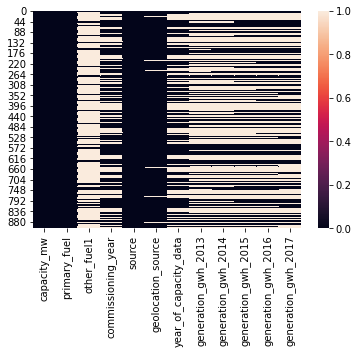

In [35]:
import seaborn as sns
sns.heatmap(df.isnull())

# Univariate analysis
Univariate analysis is the simplest form of analyzing data.

#lets start with Distribution ploting.

In [36]:
df.capacity_mw.value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

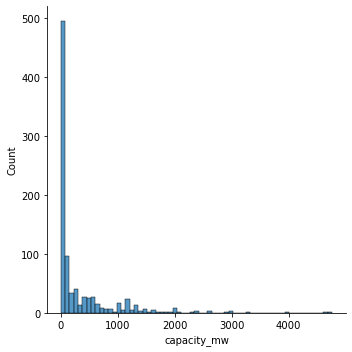

In [37]:
sns.displot(df['capacity_mw'])

Observations:

    1. As seen data is not normalised.
    2. Maximum data is spred between 0-1000 mw.

In [38]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

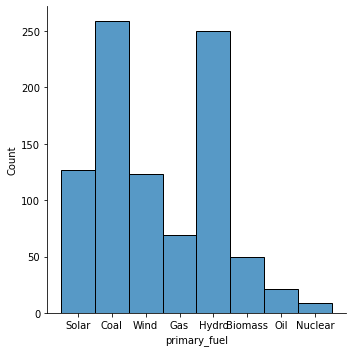

In [39]:
sns.displot(df['primary_fuel'])

Observations:

    1. As seen data is not normalised.
    2. Solar and hydro having maximum no of counts.
    3. oil and nuclear is at lowest counts.

In [40]:
year_of_capacity_data  520 non-null    float64
 7   generation_gwh_2013    384 non-null    float64
 8   generation_gwh_2014    401 non-null    float64
 9   generation_gwh_2015    425 non-null    float64
 10  generation_gwh_2016    437 non-null    float64
 11  generation_gwh_2017 

SyntaxError: invalid syntax (<ipython-input-40-c46766f9c7f2>, line 1)

In [ ]:
sns.displot(df['year_of_capacity_data'])

observations:
    1. as there is not any insights.

In [ ]:
sns.displot(df['generation_gwh_2013'])

Observations:
    1.Data is not normalized.
    2.Major data is spred between 0-10000 gmw. 
    3. Maximum no of power plants generation capacity is upto 10000 gwh.

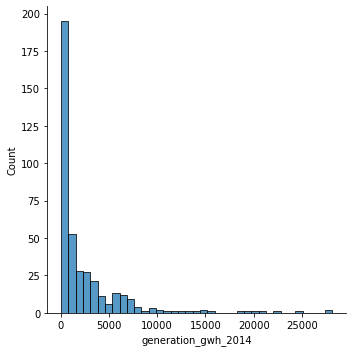

In [41]:
sns.displot(df['generation_gwh_2014'])

Observations:

    1.Data is not normalized.
    
    2.Major data is spred between 0-10000 gmw.
    
    3. Maximum no of power plants generation capacity is upto 10000 gwh.

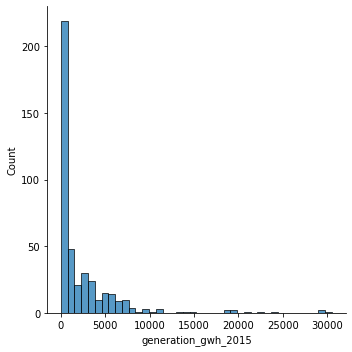

In [42]:
sns.displot(df['generation_gwh_2015'])

Observations:
    1.Data is not normalized.
    
    2.Major data is spred between 0-10000 gmw. 
    
    3. Maximum no of power plants generation capacity is upto 10000 gwh.

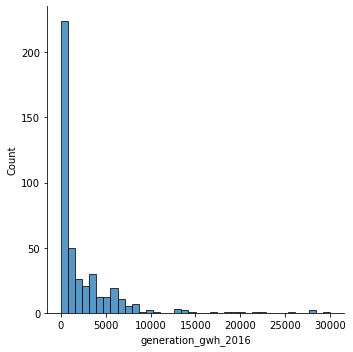

In [43]:
sns.displot(df['generation_gwh_2016'])

Observations:
    
    1.Data is not normalized.
    
    2.Major data is spred between 0-10000 gmw. 
    
    3. Maximum no of power plants generation capacity is upto 10000 gwh.

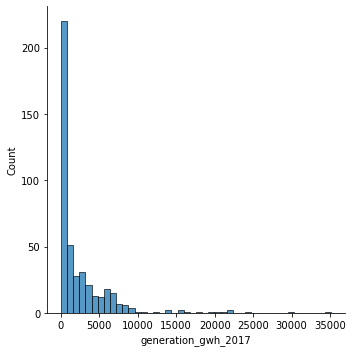

In [44]:
sns.displot(df['generation_gwh_2017'])

Observations:
    
    1.Data is not normalized.
    
    2.Major data is spred between 0-10000 gmw. 
    
    3. Maximum no of power plants generation capacity is upto 10000 gwh.

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

In [45]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'source', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

# Regplot : This method is used to plot data and a linear regression model fit.

<AxesSubplot:xlabel='capacity_mw', ylabel='year_of_capacity_data'>

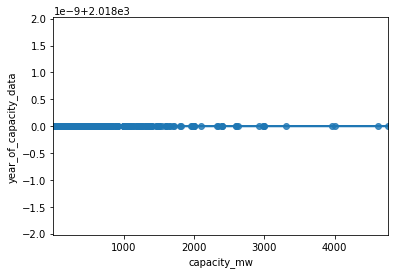

In [46]:
sns.regplot(y="year_of_capacity_data",x= "capacity_mw",data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

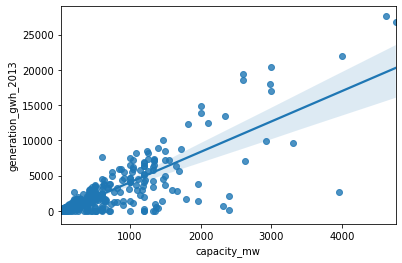

In [47]:
sns.regplot(y="generation_gwh_2013",x= "capacity_mw",data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

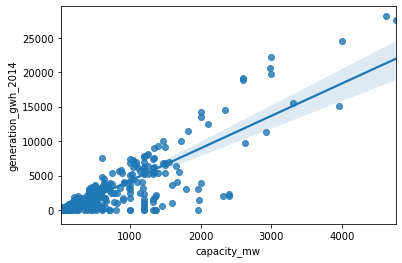

In [48]:
sns.regplot(y="generation_gwh_2014",x= "capacity_mw",data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

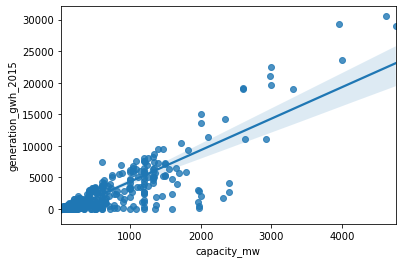

In [49]:
sns.regplot(y="generation_gwh_2015",x= "capacity_mw",data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

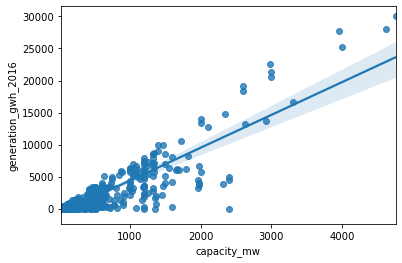

In [50]:
sns.regplot(y="generation_gwh_2016",x= "capacity_mw",data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

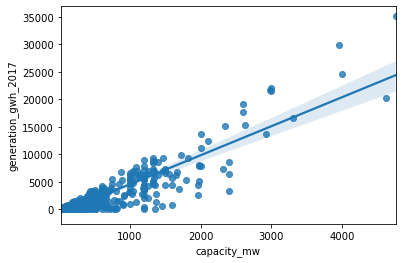

In [51]:
sns.regplot(y="generation_gwh_2017",x= "capacity_mw",data=df)

Observations:
    All the plots are self explanatory.

# Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

1.Encoding the Categorical Values.
2.Imputing missing values

# Label Encode the following Features:
we use labele Encoder for changing types of object data type to int datatype

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df['other_fuel1']=le.fit_transform(df['other_fuel1'])
df['source']=le.fit_transform(df['source'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   primary_fuel           908 non-null    int32  
 2   other_fuel1            908 non-null    int32  
 3   commissioning_year     528 non-null    float64
 4   source                 908 non-null    int32  
 5   geolocation_source     908 non-null    int32  
 6   year_of_capacity_data  520 non-null    float64
 7   generation_gwh_2013    384 non-null    float64
 8   generation_gwh_2014    401 non-null    float64
 9   generation_gwh_2015    425 non-null    float64
 10  generation_gwh_2016    437 non-null    float64
 11  generation_gwh_2017    443 non-null    float64
dtypes: float64(8), int32(4)
memory usage: 71.1 KB


In [54]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [55]:
X=df

In [56]:
import numpy as np
 
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
 
# Imputer object using the mean strategy and
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
 
data=df
 
print("Original Data : \n", data)
# Fitting the data to the imputer object
imputer = imputer.fit(data)
 
# Imputing the data    
data = imputer.transform(data)
 
print("Imputed Data : \n", data)

Original Data : 
      capacity_mw  primary_fuel  other_fuel1  commissioning_year  source  \
0            2.5             6            3              2011.0     109   
1           98.0             1            3                 NaN     174   
2           39.2             7            3                 NaN      21   
3          135.0             2            3              2004.0      22   
4         1800.0             1            2              2015.0      22   
..           ...           ...          ...                 ...     ...   
903       1600.0             1            2              2016.0      22   
904          3.0             6            3                 NaN      77   
905         25.5             7            3                 NaN      21   
906         80.0             1            3                 NaN      59   
907         16.5             7            3                 NaN      21   

     geolocation_source  year_of_capacity_data  generation_gwh_2013  \
0         

In [57]:
data

array([[2.50000000e+00, 6.00000000e+00, 3.00000000e+00, ...,
        2.41407237e+03, 2.45393629e+03, 2.53175446e+03],
       [9.80000000e+01, 1.00000000e+00, 3.00000000e+00, ...,
        2.41407237e+03, 2.45393629e+03, 2.53175446e+03],
       [3.92000000e+01, 7.00000000e+00, 3.00000000e+00, ...,
        2.41407237e+03, 2.45393629e+03, 2.53175446e+03],
       ...,
       [2.55000000e+01, 7.00000000e+00, 3.00000000e+00, ...,
        2.41407237e+03, 2.45393629e+03, 2.53175446e+03],
       [8.00000000e+01, 1.00000000e+00, 3.00000000e+00, ...,
        2.41407237e+03, 2.45393629e+03, 2.53175446e+03],
       [1.65000000e+01, 7.00000000e+00, 3.00000000e+00, ...,
        2.41407237e+03, 2.45393629e+03, 2.53175446e+03]])

In [58]:
X.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'source', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [59]:
# creating the DataFrame
df1 = pd.DataFrame(data) 

In [60]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.5,6.0,3.0,2011.000000,109.0,1.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,1.0,3.0,1996.876894,174.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,7.0,3.0,1996.876894,21.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,2.0,3.0,2004.000000,22.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1.0,2.0,2015.000000,22.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,1.0,2.0,2016.000000,22.0,2.0,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,6.0,3.0,1996.876894,77.0,0.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,7.0,3.0,1996.876894,21.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,1.0,3.0,1996.876894,59.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [61]:
df1.columns =['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'source', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   primary_fuel           908 non-null    float64
 2   other_fuel1            908 non-null    float64
 3   commissioning_year     908 non-null    float64
 4   source                 908 non-null    float64
 5   geolocation_source     908 non-null    float64
 6   year_of_capacity_data  908 non-null    float64
 7   generation_gwh_2013    908 non-null    float64
 8   generation_gwh_2014    908 non-null    float64
 9   generation_gwh_2015    908 non-null    float64
 10  generation_gwh_2016    908 non-null    float64
 11  generation_gwh_2017    908 non-null    float64
dtypes: float64(12)
memory usage: 85.2 KB


# Now use subplot and displot to check data are normalised or not.

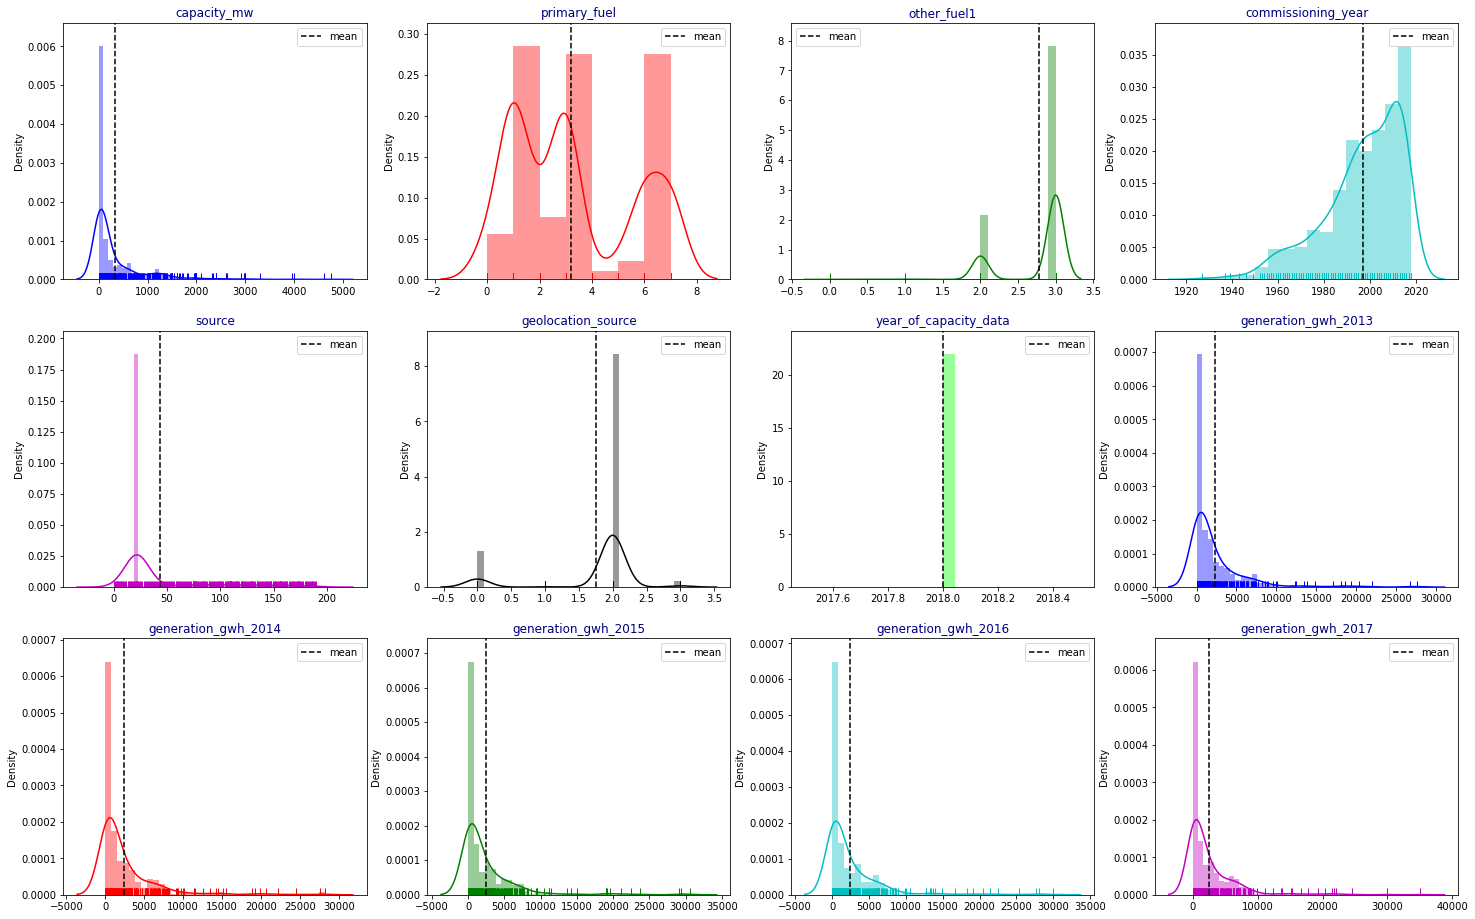

In [63]:
import itertools
import matplotlib.pyplot as plt
cols = ['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'source', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m"]
fig = plt.figure(figsize=(25,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(9,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

    1. From above plotting of distribution plot we see that some features columns are not normally distributed.
    
    2. some columns are skewed towards right.
    
    3. Building blocks are out of the normal curve hence outliers are present.

# CORRELATION BETWEEN THE COLUMNS:

In [64]:
df1.corr()

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,-0.377783,-0.598462,0.265827,-2.417009e-01,1.832864e-01,NaN,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01
primary_fuel,-0.377783,1.000000,0.477575,-0.123060,5.360860e-02,-4.199115e-01,NaN,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01
other_fuel1,-0.598462,0.477575,1.000000,-0.312623,2.546220e-01,-1.827059e-01,NaN,-3.219294e-01,-3.368479e-01,-3.326770e-01,-3.500029e-01,-3.619015e-01
commissioning_year,0.265827,-0.123060,-0.312623,1.000000,2.183213e-02,6.061649e-04,NaN,1.108482e-01,1.343054e-01,1.493040e-01,1.726976e-01,1.734004e-01
source,-0.241701,0.053609,0.254622,0.021832,1.000000e+00,-4.920752e-01,NaN,7.914133e-17,-3.157508e-17,3.266585e-17,2.296820e-17,1.136648e-17
geolocation_source,0.183286,-0.419911,-0.182706,0.000606,-4.920752e-01,1.000000e+00,NaN,1.866201e-16,4.679765e-18,1.912724e-17,1.096812e-16,2.156729e-17
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.667842,-0.120512,-0.321929,0.110848,7.914133e-17,1.866201e-16,NaN,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01
generation_gwh_2014,0.705434,-0.125000,-0.336848,0.134305,-3.157508e-17,4.679765e-18,NaN,9.634535e-01,1.000000e+00,9.537116e-01,9.260100e-01,8.918721e-01
generation_gwh_2015,0.722081,-0.125138,-0.332677,0.149304,3.266585e-17,1.912724e-17,NaN,8.963761e-01,9.537116e-01,1.000000e+00,9.689693e-01,9.284589e-01


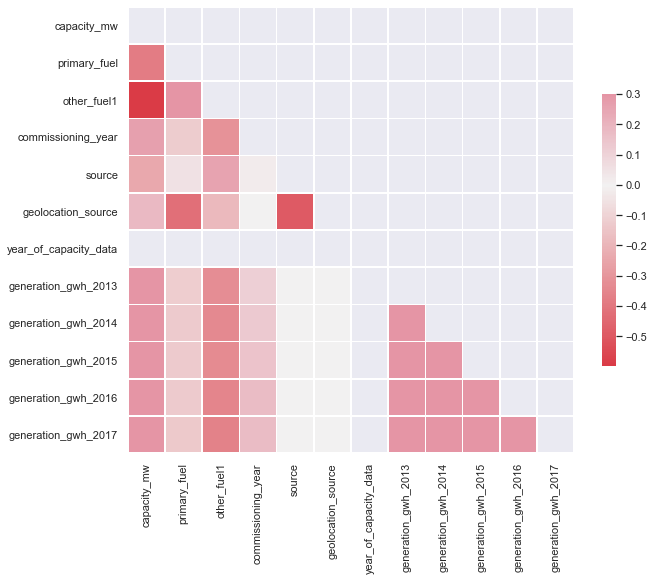

In [65]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df1.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

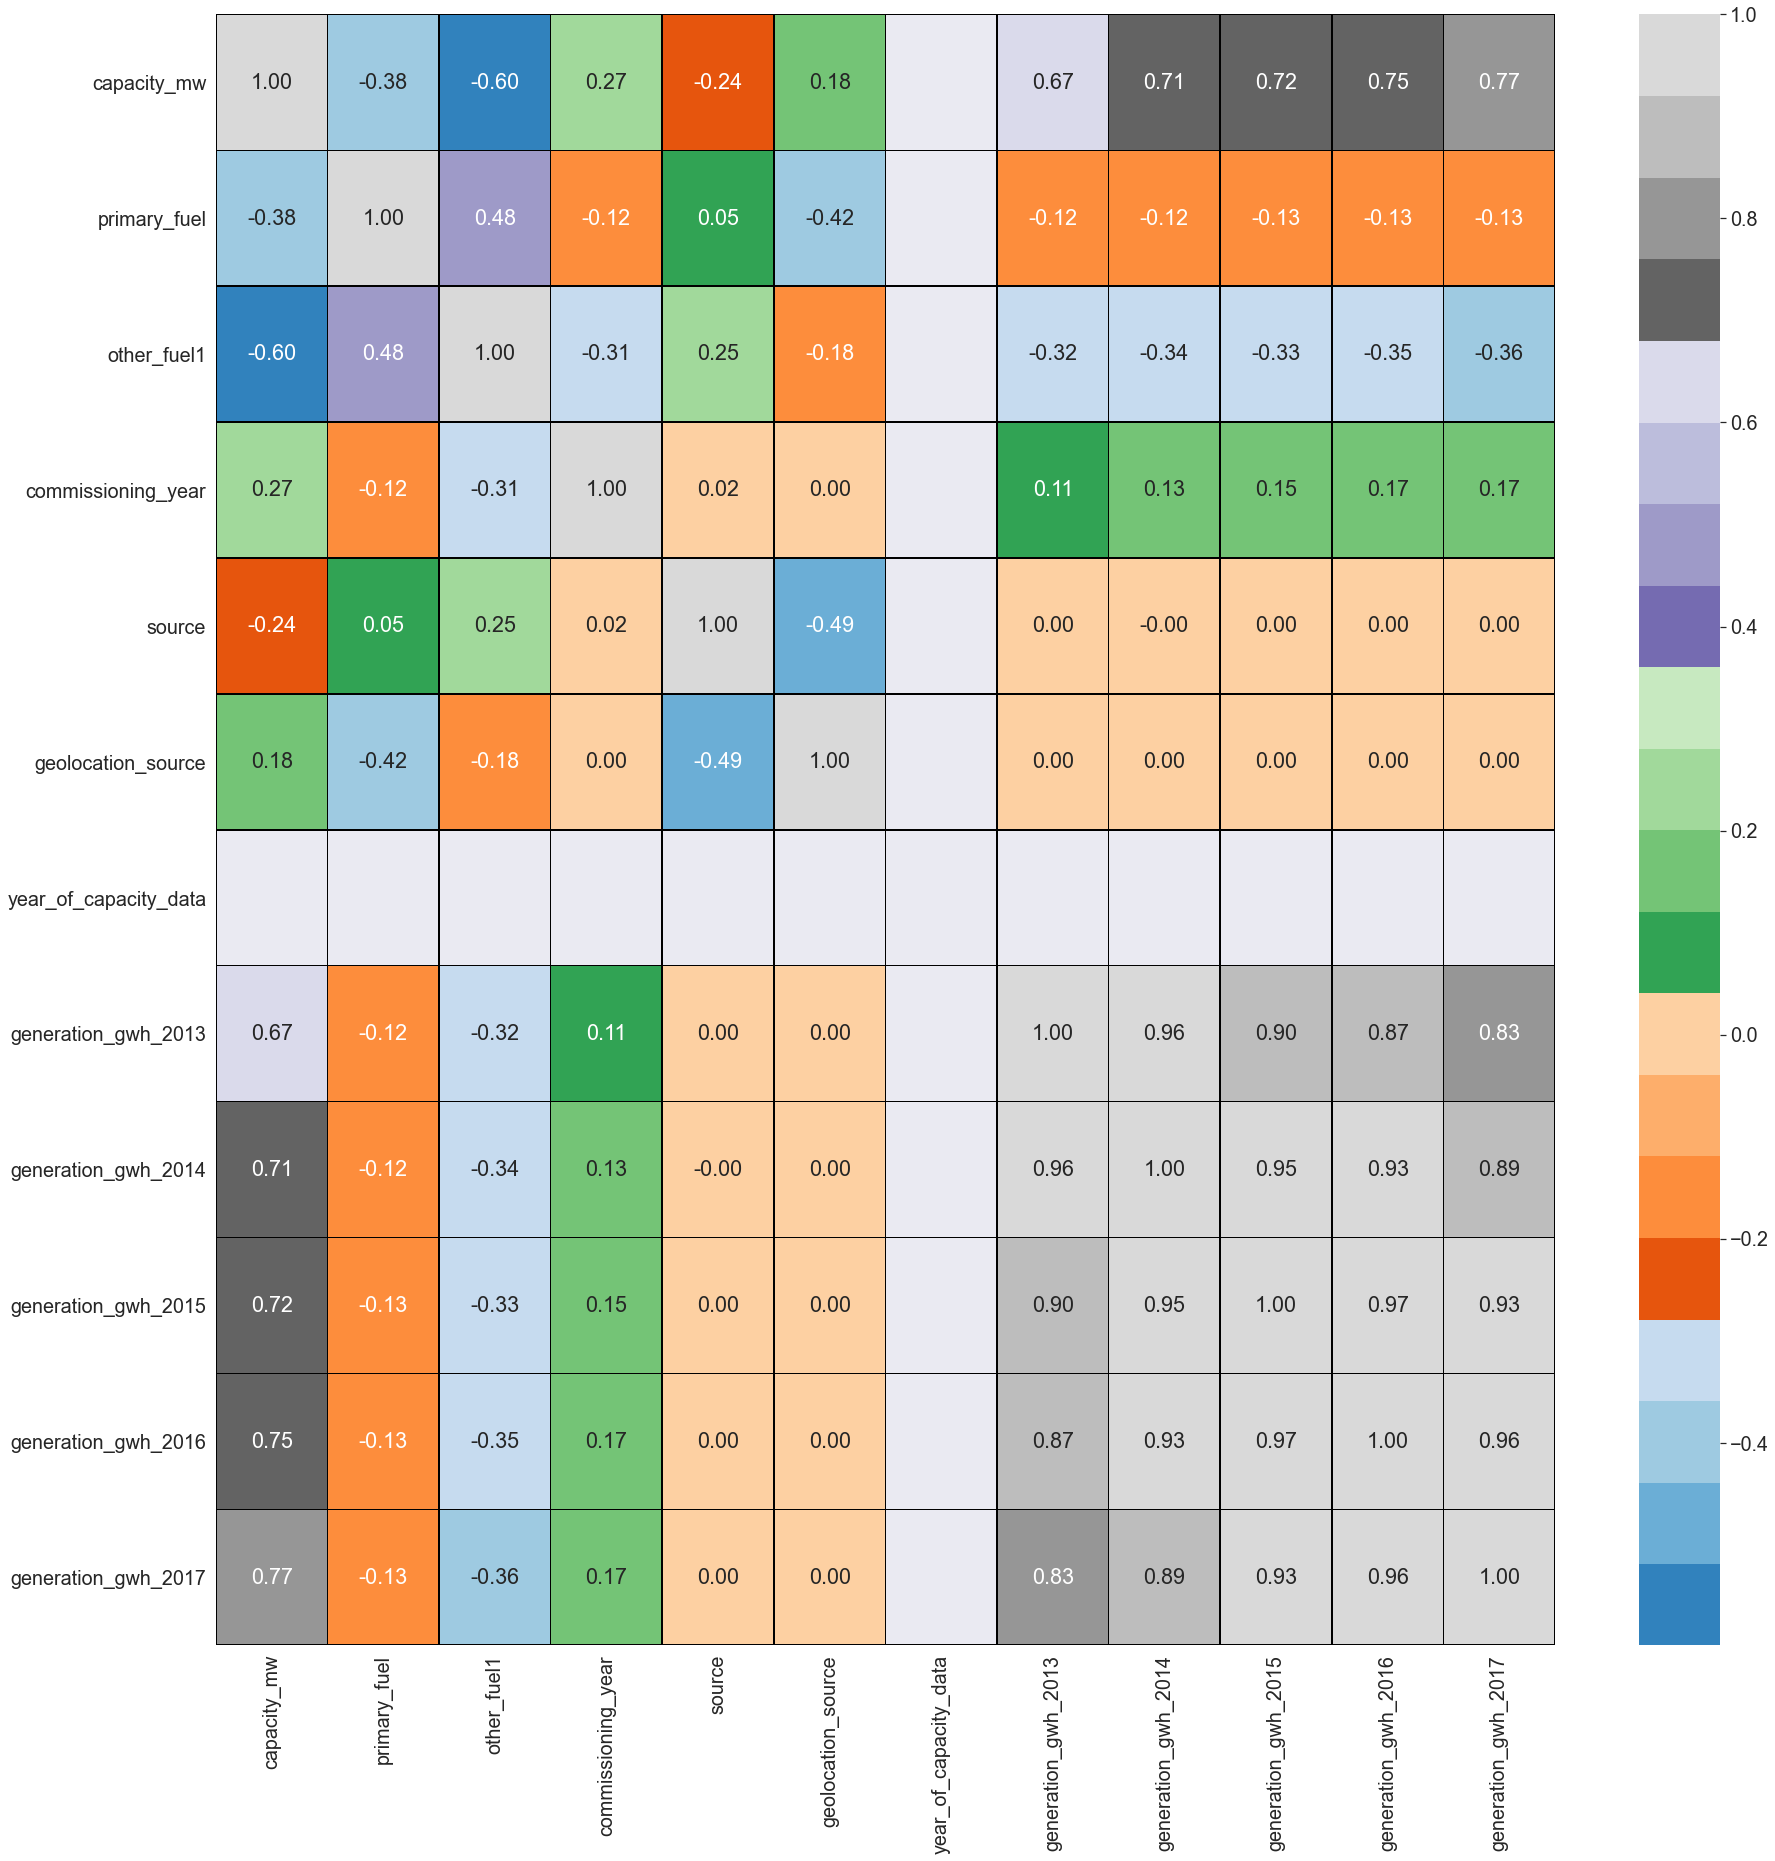

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.8)
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap="tab20c")

Observations:

    1.Correlation: From the above result it is clear that some columns making positive correlation and some making negative correlation.

    2.The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.
    
    3. Primary fuel,other fuel and source making negative impact.
    
    4.year of capacity data is making zero imaoacting on target column.hence we have to drop this feature column.

# Discription of dataset

In [67]:
df1.describe()

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,3.205947,2.776432,1996.876894,43.823789,1.754405,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,2.281339,0.429886,12.994825,44.624092,0.699844,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,0.000000,0.000000,1927.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1.000000,3.000000,1996.876894,22.000000,2.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,3.000000,3.000000,1996.876894,22.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,6.000000,3.000000,2003.000000,29.250000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,7.000000,3.000000,2018.000000,190.000000,3.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


# PLOTTING THE DISCRIPTION OF DATASET

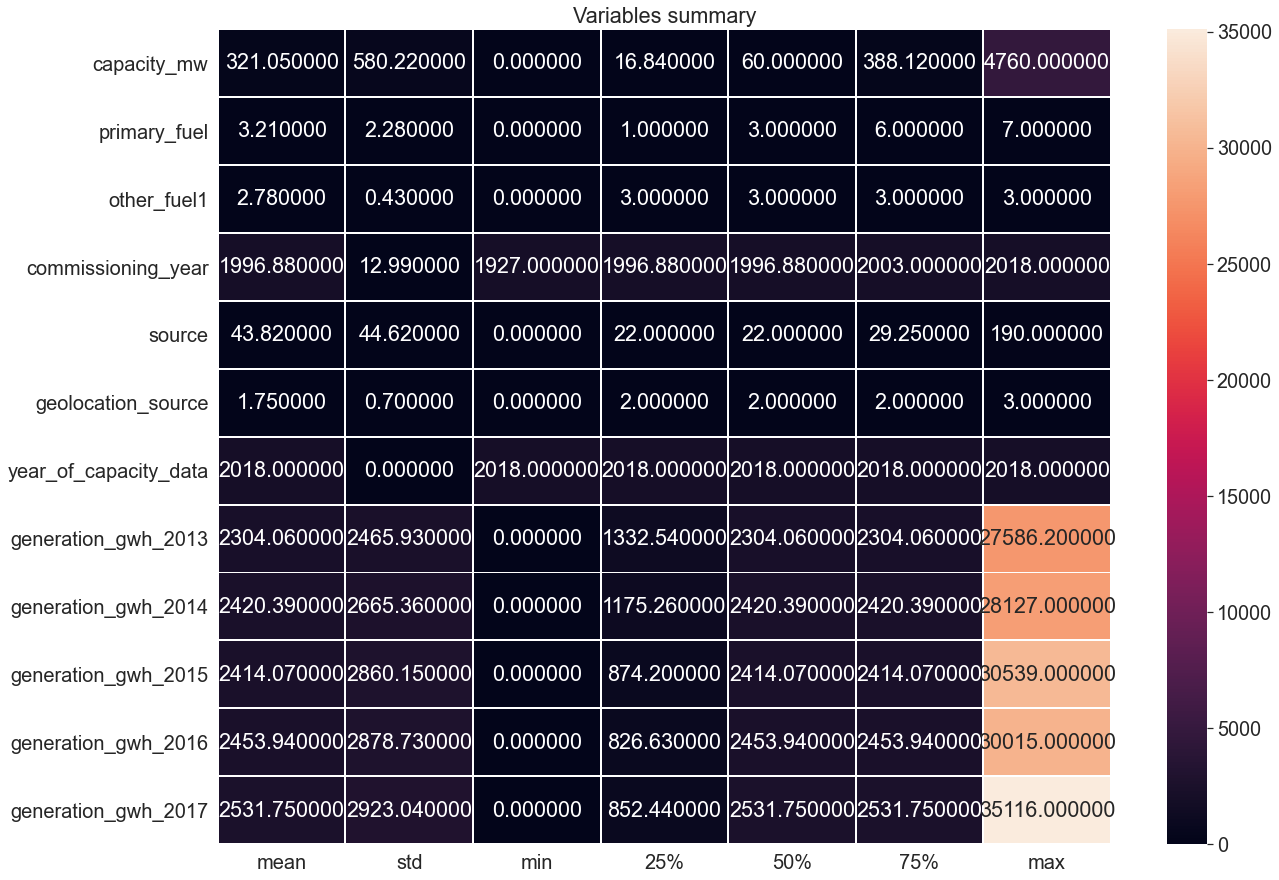

In [68]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Variables summary")
sns.set(font_scale=1.5)
plt.show()


Observations:

    1.From above ploting we can easily look at mean,std-deviation,min and max values of each columns,it helps in further data cleaning.

In [69]:
df1

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6.0,3.0,2011.000000,109.0,1.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,1.0,3.0,1996.876894,174.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,7.0,3.0,1996.876894,21.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,2.0,3.0,2004.000000,22.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1.0,2.0,2015.000000,22.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,1.0,2.0,2016.000000,22.0,2.0,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,6.0,3.0,1996.876894,77.0,0.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,7.0,3.0,1996.876894,21.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,1.0,3.0,1996.876894,59.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
x=df1.drop('capacity_mw', axis=1)

In [72]:
x.shape

(908, 11)

In [73]:
x

,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,6.0,3.0,2011.000000,109.0,1.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1.0,3.0,1996.876894,174.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,7.0,3.0,1996.876894,21.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,2.0,3.0,2004.000000,22.0,2.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1.0,2.0,2015.000000,22.0,2.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,2.0,2016.000000,22.0,2.0,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,6.0,3.0,1996.876894,77.0,0.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,7.0,3.0,1996.876894,21.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,1.0,3.0,1996.876894,59.0,2.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [74]:
y=df["capacity_mw"]

In [75]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

In [76]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [77]:
vif_calc()

      VIF Factor               features
0       1.701951           primary_fuel
1       1.788909            other_fuel1
2       1.140845     commissioning_year
3       1.553778                 source
4       1.722747     geolocation_source
5   27747.218584  year_of_capacity_data
6      15.715843    generation_gwh_2013
7      33.990118    generation_gwh_2014
8      27.818747    generation_gwh_2015
9      34.024195    generation_gwh_2016
10     15.299968    generation_gwh_2017


In [78]:
df = df1.drop(['year_of_capacity_data','source'], axis=1)

In [79]:
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6.0,3.0,2011.000000,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,1.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,7.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,2.0,3.0,2004.000000,2.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1.0,2.0,2015.000000,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,1.0,2.0,2016.000000,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,6.0,3.0,1996.876894,0.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,7.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,1.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


we drop highly correlated columns..

# Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

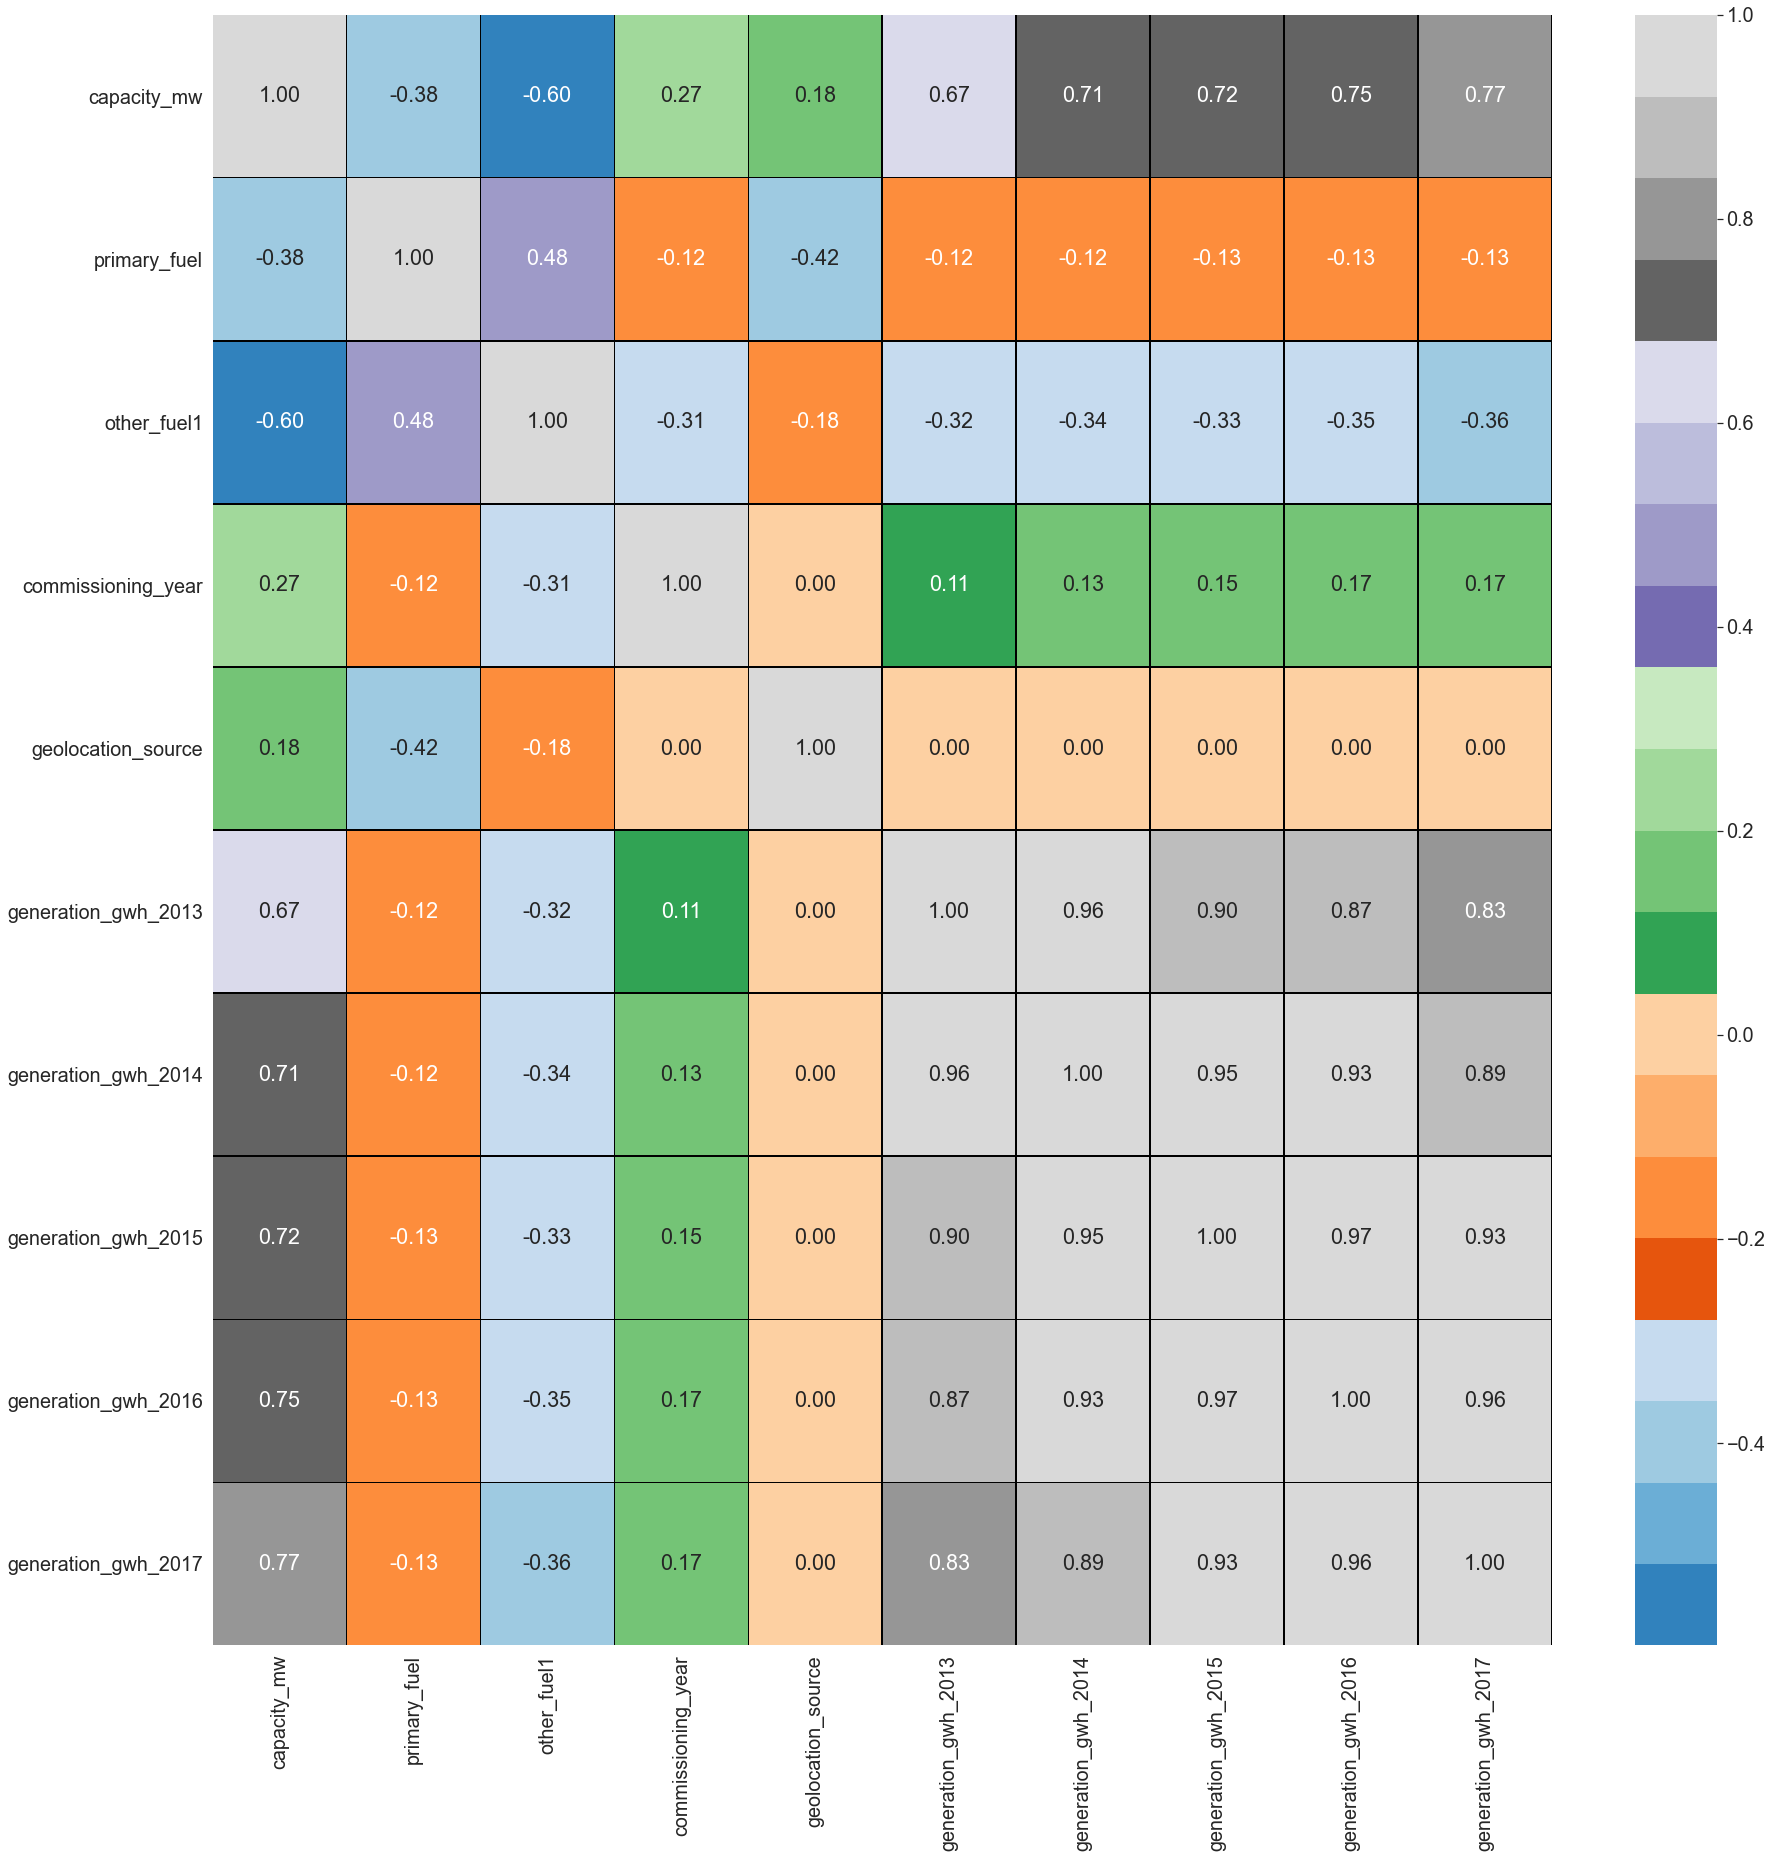

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.8)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap="tab20c")

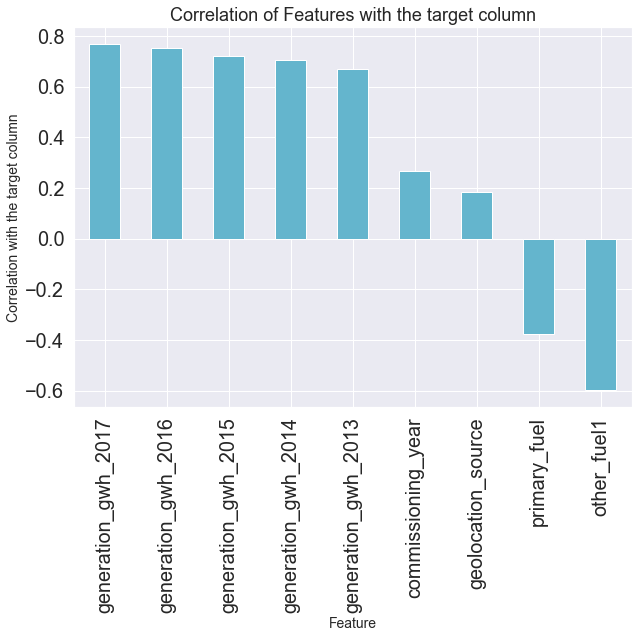

In [81]:
plt.figure(figsize=(10,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


observations:
    1. it is clear that primary fuel and other fuel making negative impact on target variable.

# Cheak the skewness:

In [82]:
df.skew()

capacity_mw            3.193257
primary_fuel           0.471141
other_fuel1           -1.619441
commissioning_year    -1.383330
geolocation_source    -1.922080
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

Observations:
    1.generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 is highly skewed feature column. 

     
    2. if data is skewed then there are outlier are present,lets plotting the same.
    

# Detecting outliers:

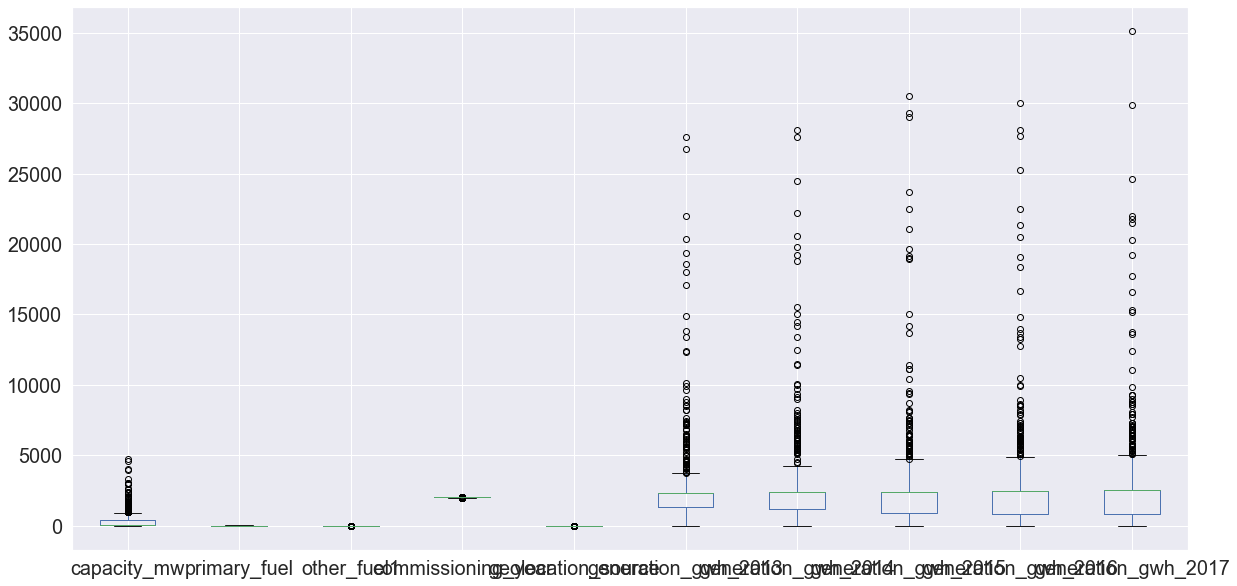

In [83]:
df.plot.box(figsize=(20,10))
sns.set(font_scale=1.2)

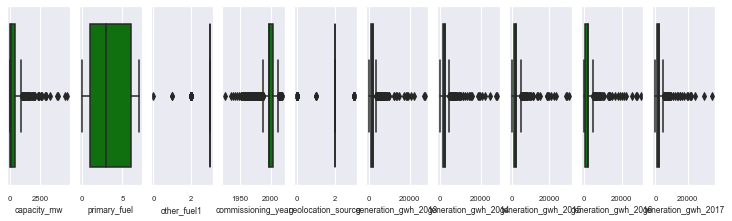

In [84]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
sns.set(font_scale=.7)
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


Observation:
    1.eneration_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 having maximum outlier present.
    

# Check the percentage of data falls under outliers:

In [85]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
        210, 210, 210, 210, 210, 222, 309, 309, 309, 309, 309, 309, 343,
        364, 365, 365, 365, 365, 365, 365, 372, 376, 445, 455, 479, 483,
        485, 494, 494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495,
        533, 539, 542, 575, 584, 602, 622, 649, 649, 649, 649, 649, 649,
        658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696, 707, 710,
        722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727, 727,
        727, 727, 729, 787, 787, 787, 787, 787, 787, 789, 808, 809, 809,
        809, 809, 809, 812, 814, 818, 849, 881, 881, 881, 881, 881, 881],
       dtype=int64),
 array([0, 7, 8, 9, 0, 5, 6, 7, 8, 9, 5, 6, 0, 5, 6, 7, 8, 9, 3, 0, 5, 6,
        7, 8, 9, 3, 0, 0, 5, 6, 7, 8, 9, 3, 0, 3, 3, 3, 0, 3, 0, 5, 6, 7,
        8, 9, 0, 5, 6, 7, 8, 9, 5, 3, 3, 3, 3, 3, 3, 0, 5, 6, 7, 8, 9, 0,
        5, 6, 7, 8, 9, 0, 6, 7, 8, 9, 3, 3, 5, 6, 7, 8, 5, 6, 7, 8, 9, 0,
        5, 6, 7, 8, 9, 3,

In [86]:
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6.0,3.0,2011.000000,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,1.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,7.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,2.0,3.0,2004.000000,2.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1.0,2.0,2015.000000,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,1.0,2.0,2016.000000,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,6.0,3.0,1996.876894,0.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,7.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,1.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [87]:
df.shape

(908, 10)

In [88]:
df_new.shape

(865, 10)

In [89]:
percentage_loss=((908-865)/908)*100
print(percentage_loss)

4.73568281938326


observations:

    1.The data loss is 4.73 percentile,which is under 10% so we go for further data cleaning.

# Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

# 1.Prediction Of Capacity in GWH

# Split the dataset in input columns and target columns..

In [90]:
x=df.drop('capacity_mw', axis=1)

In [91]:
y=df['capacity_mw']

# Removing skewness by transforming data.

In [92]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.17102468,  0.52978822,  1.27755576, ...,  0.31414141,
         0.31812958,  0.31588979],
       [-0.99559029,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       [ 1.44103901,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       ...,
       [ 1.44103901,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       [-0.99559029,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       [ 1.44103901,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979]])

In [93]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.17102468,  0.52978822,  1.27755576, ...,  0.31414141,
         0.31812958,  0.31588979],
       [-0.99559029,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       [ 1.44103901,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       ...,
       [ 1.44103901,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       [-0.99559029,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979],
       [ 1.44103901,  0.52978822, -0.14996213, ...,  0.31414141,
         0.31812958,  0.31588979]])

# Since the target column has continous data type we will use Linear Regression model.
Regressor Model Building:
Linear Regression:

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [111]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    #round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2)
    print("At random state",i," The model performs very well")
    print("At random_state:-",i)
    print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
    print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 0  The model performs very well
At random_state:- 0
Training r2_score is:- 54.637416326639496
Testing r2_score is:- 52.18019205295228
At random state 1  The model performs very well
At random_state:- 1
Training r2_score is:- 53.29530648424905
Testing r2_score is:- 56.24512639993095
At random state 2  The model performs very well
At random_state:- 2
Training r2_score is:- 54.35461391699925
Testing r2_score is:- 52.364566063334884
At random state 3  The model performs very well
At random_state:- 3
Training r2_score is:- 55.46967787242667
Testing r2_score is:- 47.32233877875809
At random state 4  The model performs very well
At random_state:- 4
Training r2_score is:- 55.2893167483367
Testing r2_score is:- 49.106531746476634
At random state 5  The model performs very well
At random_state:- 5
Training r2_score is:- 51.87053814979088
Testing r2_score is:- 59.17981499809728
At random state 6  The model performs very well
At random_state:- 6
Training r2_score is:- 54.6477426515

In [115]:
from sklearn.model_selection import cross_val_score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=21)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)
pred_train=lr.predict(xtrain)

pred_test=lr.predict(xtest)

    
print(r2_score(ytest,pred_test))
print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)


0.5474944429135145
Training r2_score is:- 53.9355282113051
Testing r2_score is:- 54.749444291351445


In [116]:
print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

Training r2_score is:- 53.9355282113051
Testing r2_score is:- 54.749444291351445


In [117]:
lrs = r2_score(ytest,pred_test)
for j in range(7,20):
        lrscore = cross_val_score(lr,x,y,cv=j)
        lrc = lrscore.mean() 
        print("At cv:-",j)
        print("Cross validation score is:-",lrc*100 )
        print("R2_score is :-",lrs*100)
        print("\n")


from sklearn.metrics import accuracy_score

At cv:- 7
Cross validation score is:- 49.40525757219813
R2_score is :- 54.749444291351445


At cv:- 8
Cross validation score is:- 48.88237376088948
R2_score is :- 54.749444291351445


At cv:- 9
Cross validation score is:- 46.74930689131881
R2_score is :- 54.749444291351445


At cv:- 10
Cross validation score is:- 45.06259629805457
R2_score is :- 54.749444291351445


At cv:- 11
Cross validation score is:- 46.99788765806934
R2_score is :- 54.749444291351445


At cv:- 12
Cross validation score is:- 45.74461387244992
R2_score is :- 54.749444291351445


At cv:- 13
Cross validation score is:- 45.72941942483644
R2_score is :- 54.749444291351445


At cv:- 14
Cross validation score is:- 45.87274349994511
R2_score is :- 54.749444291351445


At cv:- 15
Cross validation score is:- 45.021852995232045
R2_score is :- 54.749444291351445


At cv:- 16
Cross validation score is:- 44.39446669277415
R2_score is :- 54.749444291351445


At cv:- 17
Cross validation score is:- 42.05862894829316
R2_score is :- 

At cv:- 7
Cross validation score is:- 49.40525757219813
R2_score is :- 54.749444291351445

In [118]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [119]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Error:
Mean Absolute Error: 302.44358448266513
Mean Squared Error: 165459.18713274476
Root Mean Square Error: 406.76674782084234


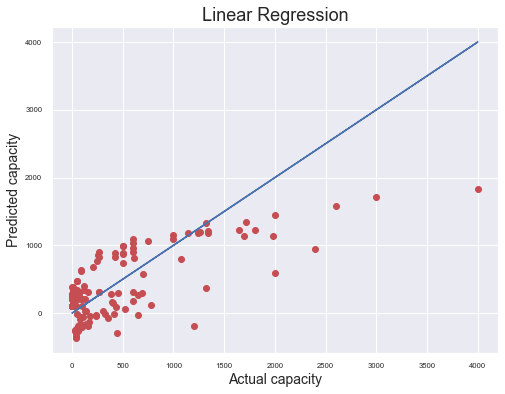

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual capacity',fontsize=14)
plt.ylabel('Predicted capacity',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

1.Lasso

In [121]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [122]:

ls = Lasso(alpha=10,random_state=0)
print(ls.fit(xtrain,ytrain))
print(ls.score(xtrain,ytrain))
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

Lasso(alpha=10, random_state=0)
0.5383308839528205
At cv:- 2
Cross validation score is:- 46.017111721994944
R2_score is :- 54.41073664168785


At cv:- 3
Cross validation score is:- 47.539466809531916
R2_score is :- 54.41073664168785


At cv:- 4
Cross validation score is:- 49.63509105644637
R2_score is :- 54.41073664168785


At cv:- 5
Cross validation score is:- 48.74017666483259
R2_score is :- 54.41073664168785


At cv:- 6
Cross validation score is:- 48.679778914870646
R2_score is :- 54.41073664168785


At cv:- 7
Cross validation score is:- 49.99603590893505
R2_score is :- 54.41073664168785


At cv:- 8
Cross validation score is:- 49.61666449080929
R2_score is :- 54.41073664168785


At cv:- 9
Cross validation score is:- 47.35769386175293
R2_score is :- 54.41073664168785




At cv:- 7
Cross validation score is:- 49.99603590893505
R2_score is :- 54.41073664168785

In [123]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [124]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 301.78570562871914
Mean Squared Error: 166697.67562225225
Root Mean Square Error: 408.286266756858


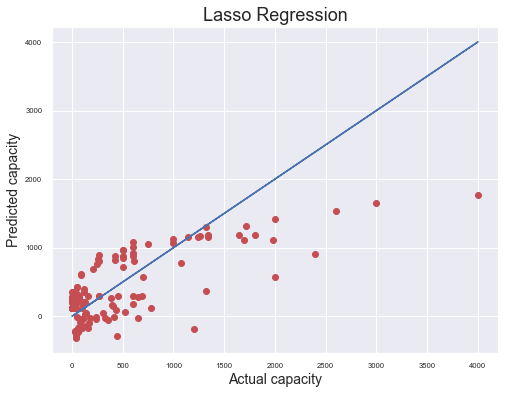

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual capacity',fontsize=14)
plt.ylabel('Predicted capacity',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [126]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [127]:
rd = Ridge(alpha=0.1, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,10):
    rds = r2_score(ytest,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 54.612018334659275
Cross Val Score: 46.279247785109725
At cv:- 3
R2 Score: 54.612018334659275
Cross Val Score: 47.87898676569651
At cv:- 4
R2 Score: 54.612018334659275
Cross Val Score: 49.44402897138499
At cv:- 5
R2 Score: 54.612018334659275
Cross Val Score: 48.92299579270997
At cv:- 6
R2 Score: 54.612018334659275
Cross Val Score: 48.865990526809604
At cv:- 7
R2 Score: 54.612018334659275
Cross Val Score: 50.05090957511318
At cv:- 8
R2 Score: 54.612018334659275
Cross Val Score: 49.81797318690654
At cv:- 9
R2 Score: 54.612018334659275
Cross Val Score: 47.69397823945427


At cv:- 7
R2 Score: 54.612018334659275
Cross Val Score: 50.05090957511318

In [128]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 302.6219470241901
Mean Squared Error: 165961.68675355893
Root Mean Square Error: 407.38395495350443


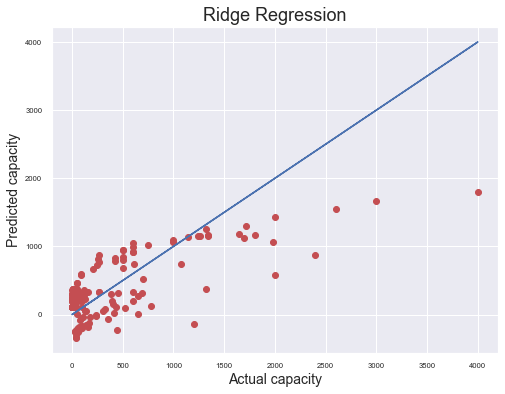

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual capacity',fontsize=14)
plt.ylabel('Predicted capacity',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2', 'splitter': 'best'}


In [138]:
dt = DecisionTreeRegressor(criterion='mse', splitter='best',max_features= 'log2')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 78.58220436696189
Cross Val Score: 70.64645989364496
At cv:- 3
R2 Score: 78.58220436696189
Cross Val Score: 72.29622600509701
At cv:- 4
R2 Score: 78.58220436696189
Cross Val Score: 74.72243998250572
At cv:- 5
R2 Score: 78.58220436696189
Cross Val Score: 73.62881397300121
At cv:- 6
R2 Score: 78.58220436696189
Cross Val Score: 71.50669838645901
At cv:- 7
R2 Score: 78.58220436696189
Cross Val Score: 73.44410740795824
At cv:- 8
R2 Score: 78.58220436696189
Cross Val Score: 72.87573068533607
At cv:- 9
R2 Score: 78.58220436696189
Cross Val Score: 73.15885435101363


At cv:- 4
R2 Score: 78.58220436696189
Cross Val Score: 74.72243998250572

In [132]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 139.7281910692751
Mean Squared Error: 87240.41981672555
Root Mean Square Error: 295.36489266113796


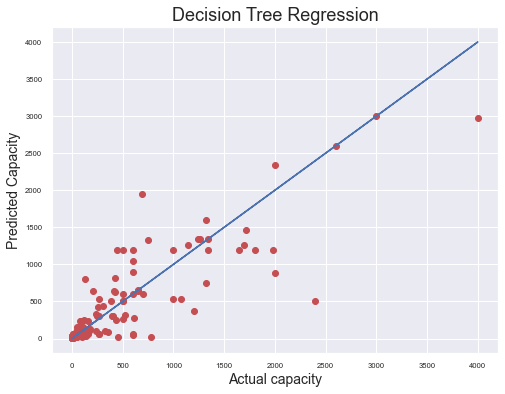

In [133]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual capacity',fontsize=14)
plt.ylabel('Predicted Capacity',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# RandomForestRegressor

In [134]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'log2', 'n_estimators': 200}


In [139]:
rf = RandomForestRegressor(criterion='friedman_mse',n_estimators=200, max_features= 'log2')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)
rfs = r2_score(ytest,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(ytest,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 87.28141700184214
Cross Val Score: 81.02287642449394
At cv:- 3
R2 Score: 87.28141700184214
Cross Val Score: 85.20622235061876
At cv:- 4
R2 Score: 87.28141700184214
Cross Val Score: 84.80788596810191
At cv:- 5
R2 Score: 87.28141700184214
Cross Val Score: 85.65166277798977
At cv:- 6
R2 Score: 87.28141700184214
Cross Val Score: 85.49854812689178
At cv:- 7
R2 Score: 87.28141700184214
Cross Val Score: 85.36230886675284
At cv:- 8
R2 Score: 87.28141700184214
Cross Val Score: 85.90012617421401
At cv:- 9
R2 Score: 87.28141700184214
Cross Val Score: 85.20804842854


At cv:- 8
R2 Score: 87.28141700184214
Cross Val Score: 85.90012617421401

In [140]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_random))
print('Mean Squared Error:',mean_squared_error(ytest,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_random)))


Error:
Mean Absolute Error: 100.65887492073703
Mean Squared Error: 46505.647751710145
Root Mean Square Error: 215.65168154157794


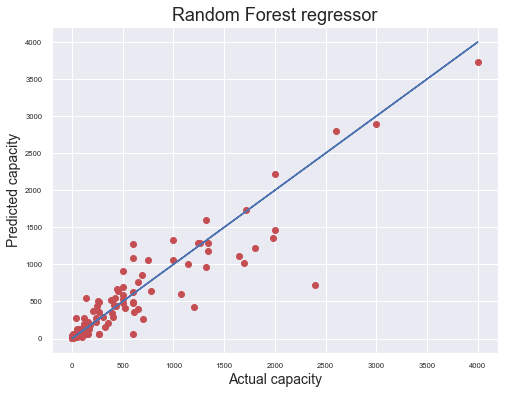

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual capacity',fontsize=14)
plt.ylabel('Predicted capacity',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [183]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 100}


In [143]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=100)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 85.24216526545369
Cross Val Score: 80.31367654139217
At cv:- 3
R2 Score: 85.24216526545369
Cross Val Score: 84.41068108608789
At cv:- 4
R2 Score: 85.24216526545369
Cross Val Score: 83.56757259476524
At cv:- 5
R2 Score: 85.24216526545369
Cross Val Score: 84.41364396763905
At cv:- 6
R2 Score: 85.24216526545369
Cross Val Score: 83.76075189270927
At cv:- 7
R2 Score: 85.24216526545369
Cross Val Score: 84.00799462894916
At cv:- 8
R2 Score: 85.24216526545369
Cross Val Score: 84.25443254572014
At cv:- 9
R2 Score: 85.24216526545369
Cross Val Score: 83.49576513948408


At cv:- 5
R2 Score: 85.24216526545369
Cross Val Score: 84.41364396763905

In [145]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 107.79585326024916
Mean Squared Error: 53962.19561897497
Root Mean Square Error: 232.29764445421088


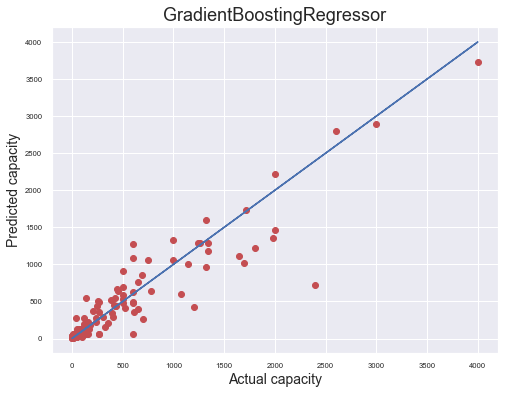

In [146]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual capacity',fontsize=14)
plt.ylabel('Predicted capacity',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# Support vector Regression

In [187]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [148]:
from sklearn.svm import SVR
sv = SVR(kernel = 'poly', gamma = 'scale',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 49.292812811000765
Cross Val Score: 17.420355793879498
At cv:- 3
R2 Score: 49.292812811000765
Cross Val Score: 31.285685447038574
At cv:- 4
R2 Score: 49.292812811000765
Cross Val Score: 35.58073297650527
At cv:- 5
R2 Score: 49.292812811000765
Cross Val Score: 38.9298970073156
At cv:- 6
R2 Score: 49.292812811000765
Cross Val Score: 38.57572652510473
At cv:- 7
R2 Score: 49.292812811000765
Cross Val Score: 38.915580844672284
At cv:- 8
R2 Score: 49.292812811000765
Cross Val Score: 39.21211137014193
At cv:- 9
R2 Score: 49.292812811000765
Cross Val Score: 36.66996720354365


At cv:- 8
R2 Score: 49.292812811000765
Cross Val Score: 39.21211137014193

In [149]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_vector))
print('Mean Squared Error:',mean_squared_error(ytest,pred_vector))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_vector)))


Error:
Mean Absolute Error: 238.83996442478647
Mean Squared Error: 185411.4240739855
Root Mean Square Error: 430.5942685103756


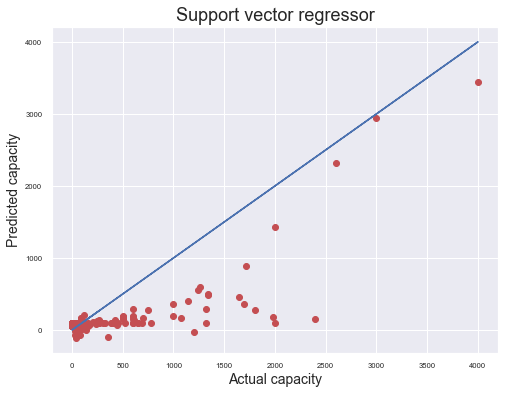

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual capacity',fontsize=14)
plt.ylabel('Predicted capacity',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [191]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


In [151]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(algorithm = 'ball_tree', weights = 'distance',n_neighbors=5)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 82.82383555701544
Cross Val Score: 1.5096593646563097
At cv:- 3
R2 Score: 82.82383555701544
Cross Val Score: 1.6022494820325655
At cv:- 4
R2 Score: 82.82383555701544
Cross Val Score: 1.599625045423288
At cv:- 5
R2 Score: 82.82383555701544
Cross Val Score: 1.6017496967769103
At cv:- 6
R2 Score: 82.82383555701544
Cross Val Score: 1.622930300924746
At cv:- 7
R2 Score: 82.82383555701544
Cross Val Score: 1.6182776013367313
At cv:- 8
R2 Score: 82.82383555701544
Cross Val Score: 1.621569089723681
At cv:- 9
R2 Score: 82.82383555701544
Cross Val Score: 1.6190347006205865


At cv:- 5
R2 Score: 82.82383555701544
Cross Val Score: 1.6017496967769103

In [152]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_k))
print('Mean Squared Error:',mean_squared_error(ytest,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_k)))


Error:
Mean Absolute Error: 111.7966981422237
Mean Squared Error: 62804.84653255666
Root Mean Square Error: 250.60895142144597


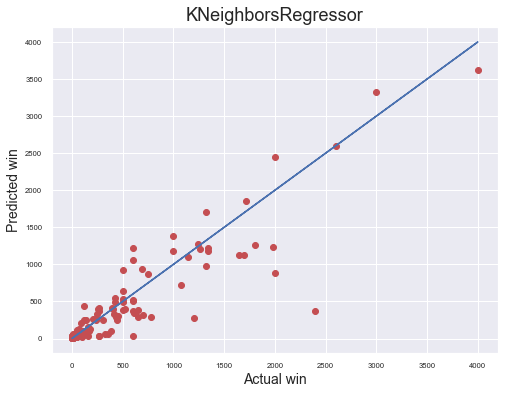

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual win',fontsize=14)
plt.ylabel('Predicted win',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()


In [156]:
#lets make a list of models and there result.
df1=pd.DataFrame()
df1['Models Tested']=['Linear Regression','Lasso Regression','Ridge Regresion','Decision Tree Regression',
                     'Random forest Regression','Gradient Boost Regression','Support vactor Regression','K-Neighbour Regression']
df1['Reult']=['At cv:- 4 R2_s is :- 54.749 Cvs is:- 49.50' ,
             'At cv:- 4 R2_s is :- 49.992 Cvs is:- 54.41 ',
             'At cv:- 4 R2 Score: 54.61 Cvs: 50.05',
             'At cv:- 2 R2 Score: 76.66 Cvs: 73.18',
             'At cv:- 4 R2 Score: 87.32 Cvs: 85.99',
             'At cv:- 4 R2 Score: 86.63 Cvs: 84.49',
             'At cv:- 4 R2 Score: 49.29 Cvs: 39.21',
             'At cv:- 4 R2 Score: 82.82 Cvs: 1.60']

In [157]:
df1

,Models Tested,Reult
0,Linear Regression,At cv:- 4 R2_s is :- 54.749 Cvs is:- 49.50
1,Lasso Regression,At cv:- 4 R2_s is :- 49.992 Cvs is:- 54.41
2,Ridge Regresion,At cv:- 4 R2 Score: 54.61 Cvs: 50.05
3,Decision Tree Regression,At cv:- 2 R2 Score: 76.66 Cvs: 73.18
4,Random forest Regression,At cv:- 4 R2 Score: 87.32 Cvs: 85.99
5,Gradient Boost Regression,At cv:- 4 R2 Score: 86.63 Cvs: 84.49
6,Support vactor Regression,At cv:- 4 R2 Score: 49.29 Cvs: 39.21
7,K-Neighbour Regression,At cv:- 4 R2 Score: 82.82 Cvs: 1.60


# Random Forest Regressor..
At cv:- 8 R2 Score: 87.32055799599426 Cross Val Score: 85.9649290685296

We tested 8 models out of whichRandom Forest Regressor performing Best as Accuracy score and CV is Optimum.

# Conclusion

In [158]:
import numpy as np
a=np.array(ytest)
a

array([9.18000e+01, 1.80000e+02, 1.05000e+01, 7.02860e+02, 4.50000e+00,
       2.60000e+02, 1.25000e+01, 9.00000e+00, 3.28000e+01, 1.20000e+02,
       2.40000e+01, 4.05000e+02, 7.20000e+00, 1.20000e+01, 7.50000e+02,
       9.50000e+01, 5.10000e+01, 5.00000e+00, 1.50000e+01, 3.50000e+01,
       1.00800e+02, 2.00000e+01, 1.14000e+03, 4.19330e+02, 1.61000e+02,
       7.50000e+01, 2.10000e+02, 5.00000e+00, 1.34000e+03, 4.00000e+02,
       9.42000e+01, 3.52000e+01, 1.25000e+02, 5.50000e+01, 6.25000e+00,
       6.00000e+02, 4.00000e+01, 5.00000e+00, 4.20000e+02, 4.00000e+01,
       6.10000e+02, 4.00000e+00, 3.75000e+01, 5.04000e+01, 2.00000e+03,
       5.80000e+00, 6.00000e+02, 4.00000e+00, 5.45000e+01, 6.00000e+01,
       3.10000e+02, 8.15000e+01, 6.00000e+02, 5.50000e+01, 3.60000e+01,
       5.00000e+02, 4.40000e+02, 6.00000e+02, 1.32500e+03, 3.00000e+00,
       2.00000e+00, 6.00000e+01, 3.20000e+01, 3.90000e+02, 1.89000e+01,
       1.60000e+01, 5.00000e+00, 5.00000e+02, 1.00000e+01, 1.000

In [159]:
predicted=np.array(pred_random)
predicted

array([  33.89956391,  187.29475   ,   19.47067143,  266.22566   ,
         18.57676786,  510.35477255,   19.68589459,    8.03246429,
         36.529     ,  282.45185   ,   33.89956391,  292.489575  ,
         33.89956391,   33.89956391, 1056.8337    ,  101.948     ,
         33.89956391,   20.70821284,   14.51329048,   62.41103417,
         33.89956391,   20.70821284, 1012.1       ,  452.677855  ,
        229.43895   ,  104.24925   ,  368.0515    ,   20.70821284,
       1181.3       ,  339.0987    ,  129.293     ,   33.89956391,
         68.29149571,  100.30225   ,   36.41645782, 1271.1058    ,
         20.70821284,   20.70821284,  434.3037519 ,   20.70821284,
        358.4416    ,   17.22647083,   33.89956391,   33.89956391,
       1470.3469    ,   20.70821284,  623.719     ,   13.9358447 ,
         62.41103417,   69.28875   ,  286.3066    ,   34.52253486,
         62.41103417,   62.41103417,  273.6432    ,  913.805     ,
        670.55118833,  490.25865   ,  965.2212    ,   36.41645

In [160]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [161]:
df_com

,original,predicted
0,91.80,33.899564
1,180.00,187.294750
2,10.50,19.470671
3,702.86,266.225660
4,4.50,18.576768
...,...,...
177,70.00,123.719000
178,250.00,435.348740
179,1800.00,1227.753400
180,240.00,228.954000


In [162]:
df_com.sample(5)

,original,predicted
128,66.0,54.396098
37,5.0,20.708213
104,39.2,46.456000
36,40.0,20.708213
70,22.8,19.685895


The best model is Random forest Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Our Model performs with Accuracy  87.32%...

# Saving the best model using pkl extension

In [163]:
import pickle
filename = 'capacity prediction .pkl'
pickle.dump(rf, open(filename, 'wb'))

# 2.Prediction of Primary Fuel for power plants.

# Split the dataset in input columns and target columns..

# Regressor Model Building:
Linear Regression:

In [164]:
df['primary_fuel']

0      6.0
1      1.0
2      7.0
3      2.0
4      1.0
      ... 
903    1.0
904    6.0
905    7.0
906    1.0
907    7.0
Name: primary_fuel, Length: 908, dtype: float64

In [165]:
df.primary_fuel.value_counts()

1.0    259
3.0    250
6.0    127
7.0    123
2.0     69
0.0     50
5.0     21
4.0      9
Name: primary_fuel, dtype: int64

In [166]:
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6.0,3.0,2011.000000,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,1.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,7.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,2.0,3.0,2004.000000,2.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1.0,2.0,2015.000000,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,1.0,2.0,2016.000000,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,6.0,3.0,1996.876894,0.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,7.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,1.0,3.0,1996.876894,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [167]:
x=df.drop(['primary_fuel'],axis=1)

In [168]:
y=df['primary_fuel']

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [170]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 767  The model performs very well
At random_state:- 767
Training r2_score is:- 36.503265028992736
Testing r2_score is:- 36.501199633034254


In [171]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=767)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)
pred_train=lr.predict(xtrain)

pred_test=lr.predict(xtest)

    
print(r2_score(ytest,pred_test))
print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)


0.36501199633034254
Training r2_score is:- 36.503265028992736
Testing r2_score is:- 36.501199633034254


In [172]:
print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

Training r2_score is:- 36.503265028992736
Testing r2_score is:- 36.501199633034254


In [175]:
lrs = r2_score(ytest,pred_test)
for j in range(2,10):
        lrscore = cross_val_score(lr,x,y,cv=j)
        lrc = lrscore.mean() 
        print("At cv:-",j)
        print("Cross validation score is:-",lrc*100 )
        print("R2_score is :-",lrs*100)
        print("\n")


from sklearn.metrics import accuracy_score

At cv:- 2
Cross validation score is:- 35.031952884133375
R2_score is :- 36.501199633034254


At cv:- 3
Cross validation score is:- 34.280359275871106
R2_score is :- 36.501199633034254


At cv:- 4
Cross validation score is:- 35.56613871169388
R2_score is :- 36.501199633034254


At cv:- 5
Cross validation score is:- 34.05406337884996
R2_score is :- 36.501199633034254


At cv:- 6
Cross validation score is:- 33.78573314317183
R2_score is :- 36.501199633034254


At cv:- 7
Cross validation score is:- 33.76545010982054
R2_score is :- 36.501199633034254


At cv:- 8
Cross validation score is:- 34.42383505372467
R2_score is :- 36.501199633034254


At cv:- 9
Cross validation score is:- 33.038425325844486
R2_score is :- 36.501199633034254




At cv:- 4
Cross validation score is:- 35.56613871169388
R2_score is :- 36.501199633034254


In [176]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [177]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Error:
Mean Absolute Error: 1.223183295596285
Mean Squared Error: 3.1483320196436173
Root Mean Square Error: 1.7743539724766355


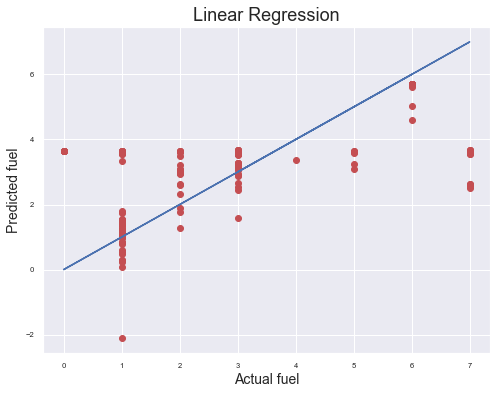

In [178]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual fuel',fontsize=14)
plt.ylabel('Predicted fuel',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

    

# 1.Lasso

In [179]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [180]:

ls = Lasso(alpha=.0001,random_state=0)
print(ls.fit(xtrain,ytrain))
print(ls.score(xtrain,ytrain))
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

Lasso(alpha=0.0001, random_state=0)
0.3650326281613616
At cv:- 2
Cross validation score is:- 35.0328798316632
R2_score is :- 36.502175777958534


At cv:- 3
Cross validation score is:- 34.28026399786866
R2_score is :- 36.502175777958534


At cv:- 4
Cross validation score is:- 35.56629805754364
R2_score is :- 36.502175777958534


At cv:- 5
Cross validation score is:- 34.054162752472536
R2_score is :- 36.502175777958534


At cv:- 6
Cross validation score is:- 33.78554159034978
R2_score is :- 36.502175777958534


At cv:- 7
Cross validation score is:- 33.76573801397594
R2_score is :- 36.502175777958534


At cv:- 8
Cross validation score is:- 34.42397666477666
R2_score is :- 36.502175777958534


At cv:- 9
Cross validation score is:- 33.03831402687338
R2_score is :- 36.502175777958534




At cv:- 2
Cross validation score is:- 35.0328798316632
R2_score is :- 36.502175777958534


In [181]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [182]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 1.2232713432091638
Mean Squared Error: 3.1482836214328924
Root Mean Square Error: 1.7743403341616546


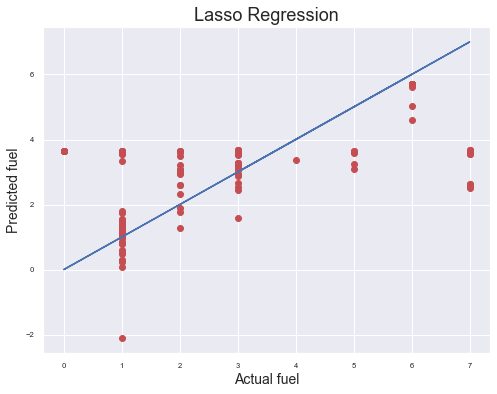

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual fuel',fontsize=14)
plt.ylabel('Predicted fuel',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [184]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.0001, 'copy_X': True, 'fit_intercept': False, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [185]:
rd = Ridge(alpha=0.0001, copy_X= True, fit_intercept= True, normalize=True, random_state= 1, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,10):
    rds = r2_score(ytest,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 36.501434999211966
Cross Val Score: 35.03325749896146
At cv:- 3
R2 Score: 36.501434999211966
Cross Val Score: 34.281996449402435
At cv:- 4
R2 Score: 36.501434999211966
Cross Val Score: 35.56709232242174
At cv:- 5
R2 Score: 36.501434999211966
Cross Val Score: 34.05533038747355
At cv:- 6
R2 Score: 36.501434999211966
Cross Val Score: 33.78699413969738
At cv:- 7
R2 Score: 36.501434999211966
Cross Val Score: 33.76619810029112
At cv:- 8
R2 Score: 36.501434999211966
Cross Val Score: 34.4246475012067
At cv:- 9
R2 Score: 36.501434999211966
Cross Val Score: 33.03968348879316


At cv:- 2
R2 Score: 36.501434999211966
Cross Val Score: 35.03325749896146

In [186]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 1.2231740122156805
Mean Squared Error: 3.1483203499605783
Root Mean Square Error: 1.7743506840420746


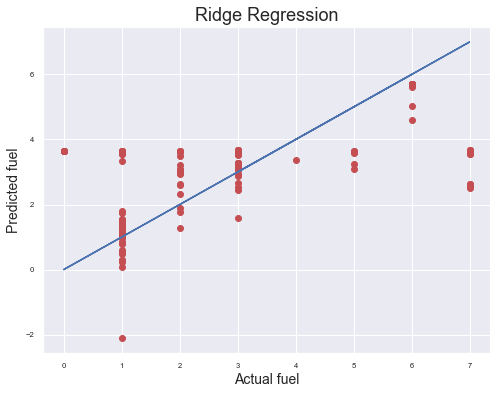

In [187]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual fuel',fontsize=14)
plt.ylabel('Predicted fuel',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
Decision Tree Regressor

In [188]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2', 'splitter': 'random'}


In [189]:
dt = DecisionTreeRegressor(criterion='mse', splitter='random',max_features= 'log2')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 20.37743185791373
Cross Val Score: 29.176410573846233
At cv:- 3
R2 Score: 20.37743185791373
Cross Val Score: 34.42042315078736
At cv:- 4
R2 Score: 20.37743185791373
Cross Val Score: 32.380605998126335
At cv:- 5
R2 Score: 20.37743185791373
Cross Val Score: 35.25166236548052
At cv:- 6
R2 Score: 20.37743185791373
Cross Val Score: 35.11274823179817
At cv:- 7
R2 Score: 20.37743185791373
Cross Val Score: 37.46227446008522
At cv:- 8
R2 Score: 20.37743185791373
Cross Val Score: 34.13080741735686
At cv:- 9
R2 Score: 20.37743185791373
Cross Val Score: 35.15336111374841


In [190]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 0.8951465201465201
Mean Squared Error: 3.9477640415140423
Root Mean Square Error: 1.98689809540249


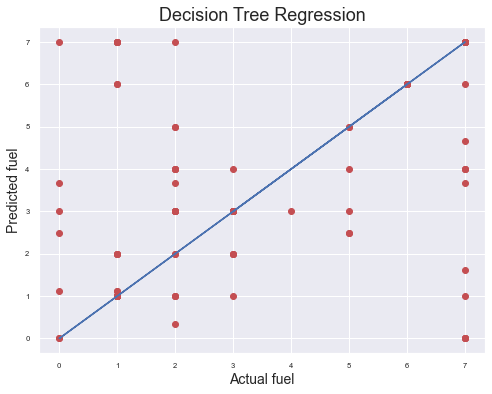

In [191]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual fuel',fontsize=14)
plt.ylabel('Predicted fuel',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# RandomForestRegressor

In [192]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 300}


In [193]:
rf = RandomForestRegressor(criterion='mae',n_estimators=300, max_features= 'sqrt')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)
rfs = r2_score(ytest,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(ytest,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 43.818455981646565
Cross Val Score: 49.64170798266739
At cv:- 3
R2 Score: 43.818455981646565
Cross Val Score: 50.63236678340625
At cv:- 4
R2 Score: 43.818455981646565
Cross Val Score: 48.699606178504666
At cv:- 5
R2 Score: 43.818455981646565
Cross Val Score: 49.43233592488797
At cv:- 6
R2 Score: 43.818455981646565
Cross Val Score: 50.05207773022998
At cv:- 7
R2 Score: 43.818455981646565
Cross Val Score: 49.88330113305319
At cv:- 8
R2 Score: 43.818455981646565
Cross Val Score: 49.281307479928735
At cv:- 9
R2 Score: 43.818455981646565
Cross Val Score: 49.68280575531723


At cv:- 3
R2 Score: 43.818455981646565
Cross Val Score: 50.63236678340625

In [196]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_random))
print('Mean Squared Error:',mean_squared_error(ytest,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_random)))


Error:
Mean Absolute Error: 0.85760989010989
Mean Squared Error: 2.785535363247863
Root Mean Square Error: 1.6689923197090701


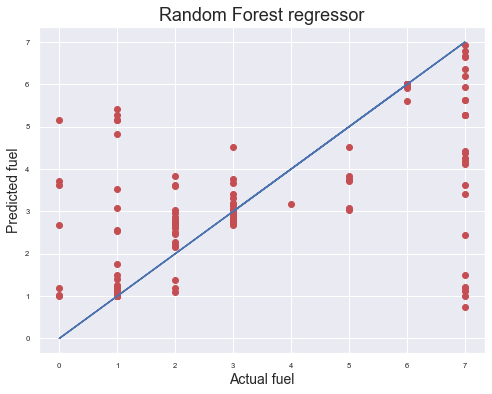

In [197]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual fuel',fontsize=14)
plt.ylabel('Predicted fuel',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [250]:

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)
1
from sklearn.datasets import make_regression

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 50}


In [198]:
gbr= GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=50)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 46.535047469961754
Cross Val Score: 50.047857622056654
At cv:- 3
R2 Score: 46.535047469961754
Cross Val Score: 49.99226593691757
At cv:- 4
R2 Score: 46.535047469961754
Cross Val Score: 49.21410202835752
At cv:- 5
R2 Score: 46.535047469961754
Cross Val Score: 48.95372301247755
At cv:- 6
R2 Score: 46.535047469961754
Cross Val Score: 48.37824611726405
At cv:- 7
R2 Score: 46.535047469961754
Cross Val Score: 48.410368420499275
At cv:- 8
R2 Score: 46.535047469961754
Cross Val Score: 47.990666445439686
At cv:- 9
R2 Score: 46.535047469961754
Cross Val Score: 47.478574159907055


At cv:- 2
R2 Score: 46.54299122866989
Cross Val Score: 50.0405272322349

In [199]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 0.9966580280209123
Mean Squared Error: 2.650844126287055
Root Mean Square Error: 1.628141310294366


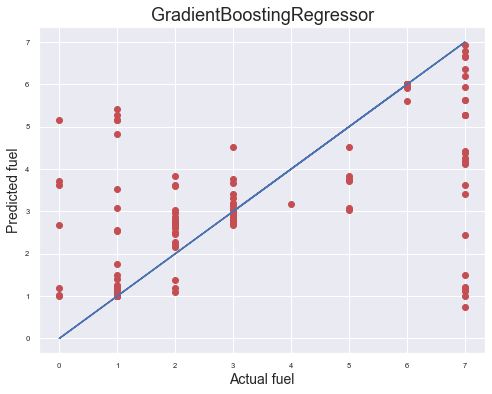

In [200]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual fuel',fontsize=14)
plt.ylabel('Predicted fuel',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# KNeighborsRegressor

In [201]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}


In [202]:
kn = KNeighborsRegressor(algorithm = 'ball_tree', weights = 'distance',n_neighbors=10)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 24.841381840014275
Cross Val Score: 0.7031068337146832
At cv:- 3
R2 Score: 24.841381840014275
Cross Val Score: 0.7831900740221766
At cv:- 4
R2 Score: 24.841381840014275
Cross Val Score: 0.7525528201535975
At cv:- 5
R2 Score: 24.841381840014275
Cross Val Score: 0.7543559357577709
At cv:- 6
R2 Score: 24.841381840014275
Cross Val Score: 0.7453864004807086
At cv:- 7
R2 Score: 24.841381840014275
Cross Val Score: 0.8121518866030293
At cv:- 8
R2 Score: 24.841381840014275
Cross Val Score: 0.7624751409794213
At cv:- 9
R2 Score: 24.841381840014275
Cross Val Score: 0.762078669415908


In [203]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_k))
print('Mean Squared Error:',mean_squared_error(ytest,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_k)))


Error:
Mean Absolute Error: 1.1219944701074995
Mean Squared Error: 3.7264370781459895
Root Mean Square Error: 1.930398165702089


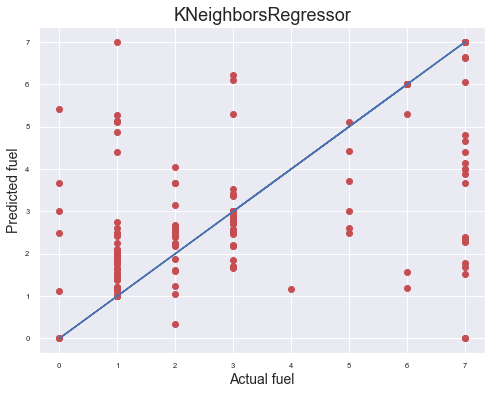

In [205]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual fuel',fontsize=14)
plt.ylabel('Predicted fuel',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()


# We tested 7 models out of which Gradient Boosting Regressor performing Best as Accuracy score and CV is Optimum.

# At cv:- 2
    
R2 Score: 46.535047469961754
    
Cross Val Score: 50.047857622056654

# Conclusion

In [207]:
import numpy as np
a=np.array(ytest)
a

array([6., 6., 1., 1., 1., 2., 3., 1., 1., 1., 5., 3., 1., 3., 6., 3., 0.,
       7., 7., 1., 1., 3., 3., 3., 7., 3., 1., 0., 1., 2., 3., 3., 2., 7.,
       3., 2., 3., 0., 5., 5., 1., 3., 7., 7., 6., 1., 3., 6., 1., 3., 3.,
       3., 3., 2., 0., 7., 3., 6., 0., 1., 3., 1., 3., 7., 1., 6., 2., 1.,
       3., 2., 1., 7., 7., 1., 1., 7., 3., 6., 3., 5., 7., 3., 6., 3., 1.,
       3., 1., 3., 2., 6., 1., 1., 6., 2., 3., 6., 6., 7., 2., 7., 7., 1.,
       7., 3., 6., 3., 3., 3., 3., 2., 1., 1., 6., 1., 3., 1., 3., 6., 3.,
       3., 1., 1., 7., 3., 0., 1., 1., 1., 4., 7., 2., 0., 7., 6., 1., 6.,
       3., 2., 6., 7., 7., 1., 5., 1., 3., 6., 2., 1., 2., 2., 2., 3., 7.,
       7., 1., 1., 3., 3., 3., 5., 2., 7., 1., 1., 6., 1., 2., 3., 1., 3.,
       7., 1., 6., 3., 1., 3., 3., 1., 2., 7., 3., 3.])

In [208]:
predicted=np.array(pred_gradient)
predicted

array([6.13976752, 6.06643749, 1.07784532, 1.04483168, 3.91172207,
       1.18587944, 2.85604565, 1.13150675, 1.05025251, 1.13150675,
       3.29631307, 3.33474218, 4.00450221, 3.12674076, 6.13976752,
       3.36257335, 3.06003998, 3.56086718, 6.72184809, 1.05025251,
       1.05025251, 2.68704834, 3.12674076, 3.36257335, 4.00450221,
       3.0193547 , 3.44916169, 3.55715352, 1.13150675, 3.55715352,
       2.94443574, 3.48830864, 3.35479228, 2.97074176, 2.85604565,
       2.62643023, 2.98124846, 3.23285187, 3.6363333 , 3.82746164,
       1.0821176 , 3.1510775 , 2.00921015, 5.96744984, 6.06643749,
       2.68337174, 2.8351216 , 5.5061286 , 1.23503704, 2.7580102 ,
       2.68645347, 3.36257335, 3.1510775 , 2.00921015, 2.68337174,
       3.55715352, 2.85604565, 6.13976752, 2.76745644, 3.41080391,
       3.12674076, 1.10462521, 2.68645347, 2.76745644, 1.05025251,
       6.13976752, 2.68645347, 3.44916169, 2.55150408, 2.64916754,
       1.05025251, 3.80252357, 6.23370775, 1.05025251, 4.47881

In [209]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [210]:
df_com

,original,predicted
0,6.0,6.139768
1,6.0,6.066437
2,1.0,1.077845
3,1.0,1.044832
4,1.0,3.911722
...,...,...
177,1.0,1.249606
178,2.0,3.410804
179,7.0,5.165676
180,3.0,3.126741


In [211]:
df_com.sample(5)

,original,predicted
107,3.0,3.126741
153,7.0,3.560867
126,1.0,1.125065
10,5.0,3.296313
179,7.0,5.165676


The best model is Gradient boosting Regression.  cross validation and r2_score is optimum.

# Our Model performs with Accuracy 46.50%...
saving the best model using pkl extension.

In [214]:
import pickle
filename = 'primary_fuel_prediction .pkl'
pickle.dump(gbr, open(filename, 'wb'))